#CHALLENGE TASK
#Stats Challege notebook 
#Fit multiple linear regression for the following data and check for the assumptions using python
#X1 22 22 25 26 24 28 29 27 24 33 39 42
#X2 15 14 18 13 12 11 11 10 5  9  7  3
#Y 55 56 55 59 66 65 69 70 75 75 78 79

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
""" Convert the data values into DataFrames"""
stats_chal={"X1":[22, 22, 25, 26, 24, 28, 29, 27, 24, 33, 39, 42],
           "X2":[15, 14, 18, 13, 12, 11, 11, 10, 5,  9,  7,  3],
           "Y":[55, 56, 55, 59, 66, 65, 69, 70, 75, 75, 78, 79]}
df = pd.DataFrame(stats_chal,columns=['X1','X2','Y']) 
print (df)

    X1  X2   Y
0   22  15  55
1   22  14  56
2   25  18  55
3   26  13  59
4   24  12  66
5   28  11  65
6   29  11  69
7   27  10  70
8   24   5  75
9   33   9  75
10  39   7  78
11  42   3  79


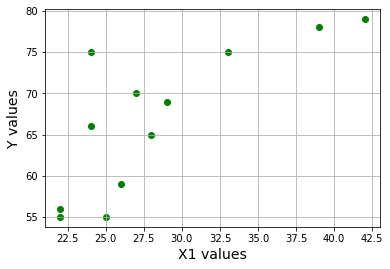

'its clear that indeed a linear relationship exists between the X1 values and the Y values. \nSpecifically, when X1 values go up, the Y values also goes up'

In [6]:
"""Check for the linearity"""
plt.scatter(df['X1'], df['Y'], color='green')
plt.xlabel('X1 values', fontsize=14)
plt.ylabel('Y values', fontsize=14)
plt.grid(True)
plt.show()
"""its clear that indeed a linear relationship exists between the X1 values and the Y values. 
Specifically, when X1 values go up, the Y values also goes up"""

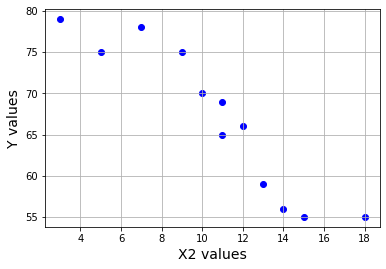

'its clear that indeed a linear relationship exists between the X2 values and the Y values. \nSpecifically, when X2 values go up, the Y values also goes down but with a negative slope'

In [7]:
"""Check for the linearity"""
plt.scatter(df['X2'], df['Y'], color='blue')
plt.xlabel('X2 values', fontsize=14)
plt.ylabel('Y values', fontsize=14)
plt.grid(True)
plt.show()
"""its clear that indeed a linear relationship exists between the X2 values and the Y values. 
Specifically, when X2 values go up, the Y values also goes down but with a negative slope"""

In [21]:
"""Performing the Multiple Linear Regression"""
X = df[['X1','X2']] # here we have 2 variables for multiple regression.
Y = df['Y']

In [48]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
mlr_model = sm.OLS(Y, X).fit()
predictions = mlr_model.predict(X) 
 
print_model = mlr_model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     38.06
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           4.06e-05
Time:                        08:08:19   Log-Likelihood:                -29.341
No. Observations:                  12   AIC:                             64.68
Df Residuals:                       9   BIC:                             66.14
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.5958      8.724      8.551      0.0

C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [9]:
"""If you plug that X1=22, X2=15 data into the regression equation, 
you’ll get the same predicted result of Y values """
y =  (74.5958) +  (0.3314)*(22)+(-1.6106)*(15)
y

57.7276

In [ ]:
y =  (74.5958) +  (0.3314)*(X1)+(-1.6106)*(X2)

In [ ]:
predicted_values=(74.5958) +  (0.3314)*(X1)+(-1.6106)*(X2)
predicted_values

In [24]:
X = df[['X1','X2']].values
X

array([[22, 15],
       [22, 14],
       [25, 18],
       [26, 13],
       [24, 12],
       [28, 11],
       [29, 11],
       [27, 10],
       [24,  5],
       [33,  9],
       [39,  7],
       [42,  3]], dtype=int64)

In [ ]:
sns.regplot(data=df,x="X",y="Y",color="green") #OLS

In [26]:
y=df["Y"]
y

0     55
1     56
2     55
3     59
4     66
5     65
6     69
7     70
8     75
9     75
10    78
11    79
Name: Y, dtype: int64

In [27]:
X = df[['X1','X2']]
X

,X1,X2
0,22,15
1,22,14
2,25,18
3,26,13
4,24,12
5,28,11
6,29,11
7,27,10
8,24,5
9,33,9


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
X_train.head()

,X1,X2
5,28,11
2,25,18
1,22,14
11,42,3
4,24,12


In [30]:
len(X_train)

8

In [31]:
len(X_test)

4

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model =LinearRegression()

In [34]:
model.fit(X_train,y_train) 

LinearRegression()

In [35]:
test_model=model.predict(X_test)

In [36]:
test_model

array([73.41369048, 69.51875902, 58.49684343, 75.31998557])

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

<AxesSubplot:xlabel='X1', ylabel='Count'>

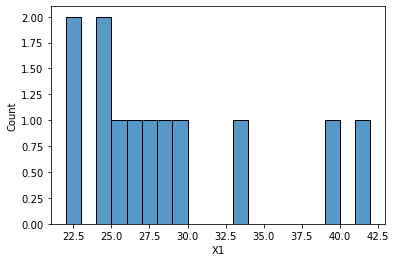

In [53]:
import seaborn as sns
sns.histplot(data=df,x="X1",bins=20)

<AxesSubplot:xlabel='X2', ylabel='Count'>

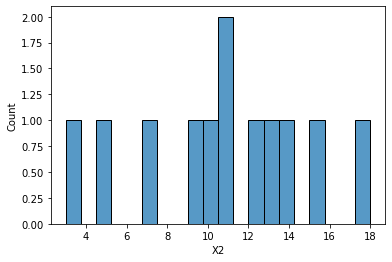

In [54]:
import seaborn as sns
sns.histplot(data=df,x="X2",bins=20)

In [56]:
mean_absolute_error(y_test,test_model)

3.471094877344875

In [57]:
mean_squared_error(y_test,test_model)

15.852135627982825

In [58]:
np.sqrt(mean_squared_error(y_test,test_model))

3.9814740521549083

In [ ]:
sns.scatterplot(x="X",y="y",data=df)#scatter plot
plt.plot(potential_spend,predicted_sales,color="green")

In [23]:
# with sklearn
from sklearn import linear_model
ml_regr = linear_model.LinearRegression()
ml_regr.fit(X, Y)

print('Intercept: \n', ml_regr.intercept_)
print('Coefficients: \n', ml_regr.coef_)

Intercept: 
 74.59582972285749
Coefficients: 
 [ 0.          0.33138486 -1.61056402]


#CHECKING FOR LINEAR REGRESSION ASSUMPTIONS 

1.Linear Relationship 
Aims at finding linear relationship between the independent and dependent variables 

TEST
A simple visual way of determining this is through the use of scatter plot

2.Variables follow a normal Distribution
This assumption ensures that for each value of independent variable, the dependent variable is a random variable following a normal distribution and its mean lies on the regression line. 

TEST
One of the ways to visually test for this assumption is through the  use of the Quantile-Quantile plot(Q-Q_Plot)


In [66]:
#Multicollinearity test 
corr =df.corr()
print(corr)

          X1        X2         Y
X1  1.000000 -0.696592  0.770767
X2 -0.696592  1.000000 -0.930008
Y   0.770767 -0.930008  1.000000


Text(0.5, 1.08, 'Scatter Plot')

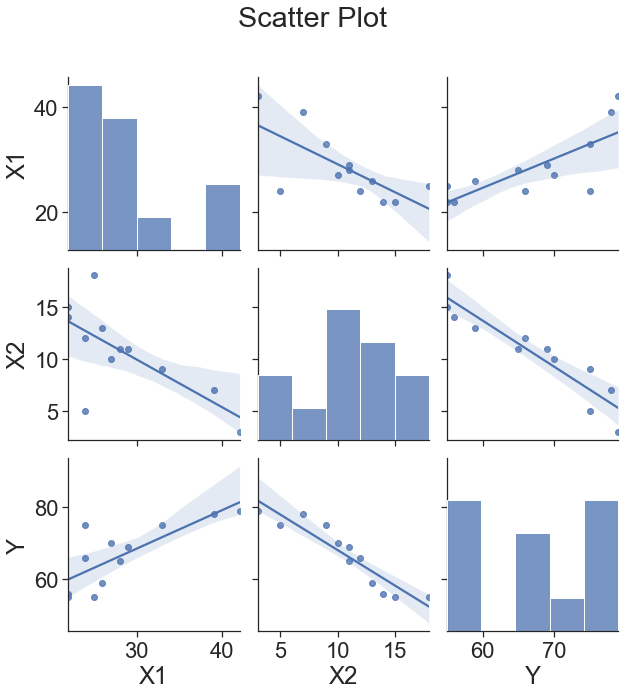

In [69]:
#Linearity and Normality Test 
import seaborn as sns 
sns.set(style="ticks", color_codes=True, font_scale=2)
g=sns.pairplot(df, height=3, diag_kind="hist",kind="reg")
g.fig.suptitle("Scatter Plot",y=1.08)  


In [47]:
X_test = sm.add_constant(X_test)
X_test

,const,X1,X2
10,1.0,39,7
9,1.0,33,9
0,1.0,22,15
8,1.0,24,5


In [51]:
y_pred=mlr_model.predict(X_test)

In [52]:
residual = y_test - y_pred

In [42]:
#No Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

In [40]:
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T
"""Little or no multicollinearity 
This assumption aims to test correlation between independent variables.
If multicollinearity exists between them (i.e independent variables are highly correlated), they are no longer independent.
TEST
Correlation Analysis (others are variance inflation factor (VIF)) and condition Index
If you find any values in which the absolute value of their correlation is >=0.8, the multicollinearity 
Assumption is being broken.
"""

,X1,X2
vif,4.085853,4.085853


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

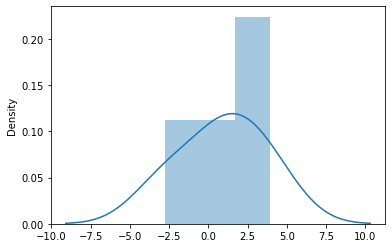

In [53]:
#Normailty of Residual
sns.distplot(residual)

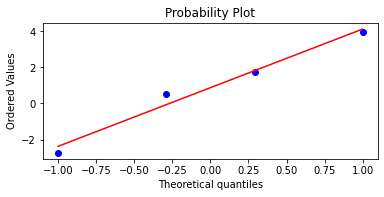

In [55]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [56]:
np.mean(residual)

0.873393042317133

<function matplotlib.pyplot.show(close=None, block=None)>

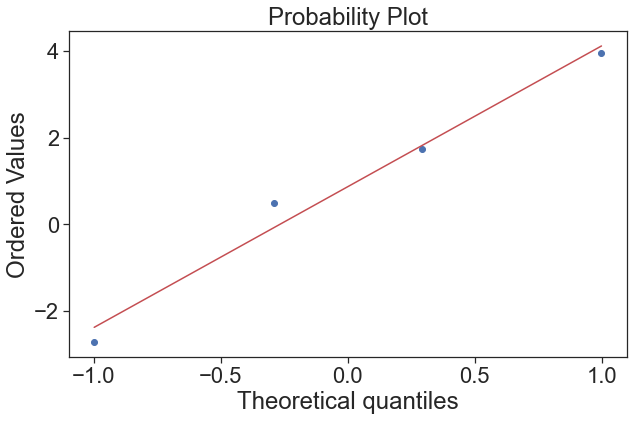

In [85]:
#Normality of error / residue 
import scipy.stats as stats 
fig, ax=plt.subplots(figsize=(10,6))
stats.probplot(residual, dist="norm",plot=plt)
plt.show 


Text(0.5, 1.0, 'Homoscedasticity')

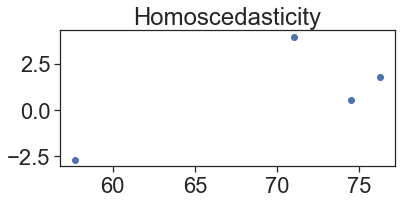

In [76]:
#Homoscedasticity
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)
plt.title("Homoscedasticity")
"""Data is homoscedastic 
The linear regression analysis makes is homoscedasticity (i.e the error terms along the regression line are equal)
This analysis is also applied to the residuals of your linear regression model. 

TEST
Homoscedasticity can be easily tested with a Scatterplot of the residuals. 
"""

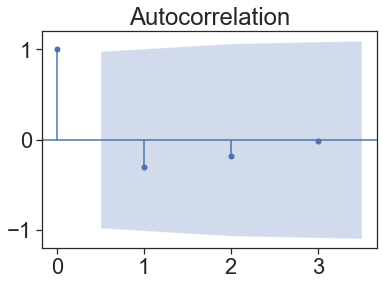

In [91]:
#No autocorrelation of residuals
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=3 , alpha=0.05)
acf.show()
"""Little or No Autocorrelation 
This next assumption is much like our previous one, except it applies to the residuals of your linear regression model. 
Linear regression analysis requires that there is little or no autocorrelation in the data.
TEST
You can test the liner regression model for autocorrelation with Durbin-Watson test(d), 
while d can assume values between 0 and 4 ,values around 2 indicates no autocorrelation. As a rule of thumb values of 1.5
"""

#Conclusion
Here performd multiple linear regression in Python using both 
sklearn and statsmodels in this both models the coefficient values are same. 
we got consistent results by applying both sklearn and statsmodels.

#Multicollinearity test : If the VIF value of greater than 10 signifies that heavy Multicollinearity in the dataset,
    a value less than 5 for a given feature specifies that there is a little relatioship that feature holds with 
    other feature.
    In this case the VIF score are 4.085853 with independet having vey weak VIF score within them, 
    so the assumption of Multicollinearity holds True in our given schemes of things. 
    
#Normailty of Residual
Residual is the differenec berween y_test & y_pred, if you check the plot for Normal distrubution , 
the plot is near Normal distrubution but its not entirely Normal distrubution and centered near to zero,
which one of the assumptions of Normal distrubution. 
One more way to validate Normal distrubution is Q-Q Plot, Here I can see that the theoritical values fall on same line, 
i.e most of the values near the line, this shows clear that the overall distribution is near Normal distrubution. 
here we can observe the mean value 0.87 it inferes that genereaal this not enough good value, meanschnege cureve towards right.
i.e to ge normal distribution the value of mean should be zero or near to zero. so our assumption is True. 

#Homoscedasticity or Constant variance 
Here we need to observe the visuvalization, overall distribution is randomly sampled, 
does it kind of inrecare with increase in residual values, here my predections on X-axis, 
overall residuals on Y-axis,i find that there is no pattern based on the predection and residual 
values, and move cenetred arond zero value.so our assumption is True.   

#No autocorrelation of residuals
Here there shoulb be absolutely no correleation of the residual value is with any of its 
lagged verstions which is called as autocorrelation, I observed in tha plot the residuals itself have a heavy correlation, 
if you observe the most of auto correlated values non of the values corss the threashold of beying significant,
so the blue color signified here shows the significance level of the autocorrelation which it should cross 
in orderd to be significant in termd of auto correlation , so here there no value cross the blue bounndary ,
so this linear regression model followign the assumptios of the linear regression. 